<a href="https://colab.research.google.com/github/AdarshKammar/Python/blob/main/Sentiment_Analysis_using_LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 170s 516ms/step - accuracy: 0.6341 - loss: 0.6068 - val_accuracy: 0.8422 - val_loss: 0.3766
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 162s 517ms/step - accuracy: 0.8781 - loss: 0.3181 - val_accuracy: 0.8648 - val_loss: 0.3270
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 211s 546ms/step - accuracy: 0.9057 - loss: 0.2511 - val_accuracy: 0.8242 - val_loss: 0.3966
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 551ms/step - accuracy: 0.9008 - loss: 0.2612 - val_accuracy: 0.8340 - val_loss: 0.3905
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 190s 514ms/step - accuracy: 0.9226 - loss: 0.2191 - val_accuracy: 0.8446 - val_loss: 0.4391
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8300 - loss: 0.4582
Test Loss: 0.44952335953712463
Test Accuracy: 0.833840012550354


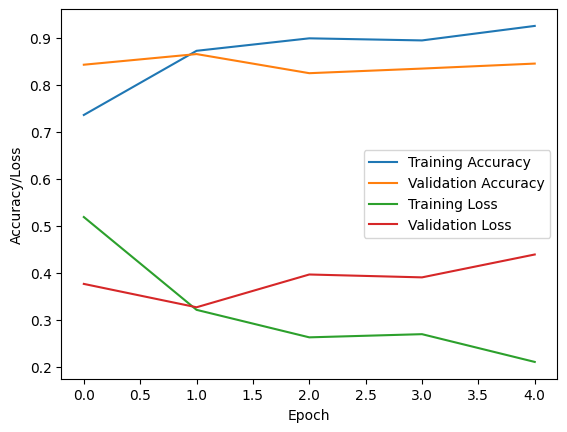

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
Review: This movie was absolutely fantastic! I loved it.
Predicted Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Review: The movie was terrible. I hated every minute of it.
Predicted Sentiment: Negative


In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Preparation
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_dataset, test_dataset = imdb['train'], imdb['test']

# 2. Text Preprocessing (Corrected Label Handling)
train_texts = []
train_labels = []
test_texts = []
test_labels = []

for text, label in train_dataset:
    train_texts.append(text.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

for text, label in test_dataset:
    test_texts.append(text.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

# Convert labels to NumPy arrays (CRUCIAL FIX)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_len = 200
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# 3. Build LSTM Model (Same as before, but included for completeness)
model = Sequential([
    Embedding(5000, 64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train LSTM Model (Now with correct labels)
history = model.fit(train_padded, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# 5. Evaluation (Same as before)
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


# 6. Inference Example (Same as before)
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded_sequence)[0][0]
    if prediction >= 0.5:
        return "Positive"
    else:
        return "Negative"

test_review = "This movie was absolutely fantastic! I loved it."
prediction = predict_sentiment(test_review)
print(f"Review: {test_review}")
print(f"Predicted Sentiment: {prediction}")

test_review = "The movie was terrible. I hated every minute of it."
prediction = predict_sentiment(test_review)
print(f"Review: {test_review}")
print(f"Predicted Sentiment: {prediction}")

model.save("sentiment_analysis_model.h5")